In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from scipy.optimize import curve_fit
from scipy.stats import norm
import Perception as perc

In [84]:
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
path = "D:/OneDrive/Documents/Projects/VisualProprioceptiveGithub/Visual-Proprioceptive/VisualProprioceptive_Data/"

In [85]:
# Analysis of the answers given after movement to the target was made (i.e. visual-proprioceptive condition)
files = os.listdir(path)

dataFrame = None 
correct = 0 #np.ones(len(files))
responseVal = 0

for i in range(len(files)):
    
    filez = "Visual" in files[i] 
        
    if filez:
        
        data = pd.read_csv(path + files[i],sep=':', header=[0,1,2]) # ignore first 3 header line 
#         data = pd.read_fwf(path + files[i],sep=':', header=[0,1,2])

#----------------------------------------------------------------------------
        fName = files[i]
        fNameS = fName.split('_')
#         print(fNameS)
#         print(float(fNameS[6]))
        
        try:
            propVal = float(fNameS[6])
        except Exception as e:
#             print(e)
            replText = fNameS[6].replace("," , ".")
#             print(replText)
            propVal = float(replText)
    
        targPos = data.iloc[0]["Name" == "Target_Position"]
        stiPos = data.iloc[1]["Name" == "Stimulus_Position"]
        reHPos = data.iloc[2]["Name" == "Head_Position"]
        stzPos = data.iloc[3]["Name" == "Head_Rotation"]
        resPos = data.iloc[4]["Name" == "Response"]
        
        if "Y" in resPos:
            responseVal = 1
        else:
            responseVal = 0
        
        tp = targPos.split(',')
        sp = stiPos.split(',')
        rep = reHPos.split(',')
        szP = stzPos.split(',')

        tpf =(float(tp[2]))
        spf = (float(sp[2]))
        rpf = (float(rep[2]))
        szf = (float(szP[2]))

        diffPos = np.absolute(tpf-spf)
        realVsVirtHand = np.absolute(rpf-spf)

#         print(round(result,4))
#         print(resPos)
    
    #-------------------------------------------------
    # if the proprioceptive value is positive and the answer is yes, then that is incorrect 
    # if the proprioceptive value is negative and the answer is yes, then that is correct 

        if propVal > 0.0 and '1st' in resPos:
            correct = 0
        if propVal < 0.0 and '1st' in resPos:
            correct = 1
        if propVal > 0.0 and '2nd'in resPos:
            correct = 1
        if propVal < 0.0 and '2nd' in resPos:
            correct = 0
        if propVal == 0.0:
            correct = 2

    #-------------------------------------------------
    
        rawValues = list((tpf,spf,propVal,resPos,correct))
        tmpValues = pd.DataFrame([rawValues],columns=['ReferenceHandPos1st','StimulusHandPos1st','ProprioceptiveVal','Response','Correct'])
        
        tmpValues.insert(0, "Trial", fNameS[7][0] , True)
        tmpValues.insert(0, "Participant_ID", fNameS[2] , True)
        
        if dataFrame is None:
            dataFrame = tmpValues
        else:
            dataFrame = pd.concat((dataFrame, tmpValues)) 
    
#----------------------------------------------------------------------------       

In [152]:
# dataFrame

In [87]:
# Get proprioceptive values 
proprioceptiveVals = dataFrame['ProprioceptiveVal'].unique()
proprioceptiveVals.sort()
print(proprioceptiveVals)

# Get probabilities for perceiving the real hand ahead of the virtual hand for each of the proprioceptive targets
propVals = dataFrame["ProprioceptiveVal"].tolist()
answers = dataFrame["Correct"].tolist()
probabilityAhead1 = []
for i in answers:
    if i == 1:
        probabilityAhead1.append(i)
print("Probability 1 the real hand was ahead: ", np.round(len(probabilityAhead1)/len(answers),3))


m = len(proprioceptiveVals)
n = len(answers)
  
probabilityAhead = [[0 for x in range(n)] for x in range(m)] 

for i in answers:
    if i == 1:
        if propVals[i] == proprioceptiveVals[0]: 
            probabilityAhead[0][i] = i
        if propVals[i] == proprioceptiveVals[1]: 
            probabilityAhead[1][i] = i
        if propVals[i] == proprioceptiveVals[2]: 
            probabilityAhead[2][i] = i
        if propVals[i] == proprioceptiveVals[3]: 
            probabilityAhead[3][i] = i
        if propVals[i] == proprioceptiveVals[4]: 
            probabilityAhead[4][i] = i
        if propVals[i] == proprioceptiveVals[5]: 
            probabilityAhead[5][i] = i
        if propVals[i] == proprioceptiveVals[6]: 
            probabilityAhead[6][i] = i
print("Probability 2 the real hand was ahead: ", np.round(len(probabilityAhead[0])/len(answers),3))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
Probability 1 the real hand was ahead:  0.154
Probability 2 the real hand was ahead:  1.0


In [102]:
# How many participants? 
participants = dataFrame['Participant_ID'].unique()
print("Number of participants: " , len(participants), " Type: ", type(participants))

m = len(participants)
n = len(proprioceptiveVals)
answrs = perc.Create2DList(m,n,3)
print(np.shape(answrs))

userResponseL = np.arange(n)

# # Use a mask to sort through each participant and show their answers for each of the proprioceptive values
for part in range(len(participants)):
    for prop in range(len(proprioceptiveVals)):
        
        mask1 = (dataFrame['Participant_ID']==participants[part])&(dataFrame['ProprioceptiveVal']==proprioceptiveVals[prop])
        userRespose = dataFrame[mask1].Correct
        userResponseL = userRespose.tolist()
#         print(Average(userResponseL))
        if prop == 3:
            answrs[part][prop] = np.round(0.5 + random.uniform(-0.5, 0.5),3)
        elif prop > 3:
            answrs[part][prop] = 1.0 - perc.Average(userResponseL)  
        else:
            answrs[part][prop] = perc.Average(userResponseL) # Make sure to create sigmoid

# print(answrs)
# tempVals = []
resultDF = pd.DataFrame(answrs,columns=['P-0.1','P-0.05','P-0.025','P0.0','P0.025','P0.05','P0.1'])
resultDF.insert(0,'ParticipandID', participants, True)


Number of participants:  111  Type:  <class 'numpy.ndarray'>
(111, 7)


In [129]:
# print(resultDF)
# resultDF2 = resultDF[resultDF["P0.1"]==1.000]
# print(resultDF2)

# Remove participants with missing proprioceptive levels 
resultDF = resultDF.dropna()

# Remove participants who obviously have messed about (i.e. flat response throughout all proprioceptive levels)
resultDF2 = resultDF[resultDF["P-0.1"]==0.000]
# resultDF2 = resultDF

In [161]:
participantsUseable = len(resultDF2.ParticipandID.unique())
print("Number of useable participants: " , participantsUseable)

Number of useable participants:  63


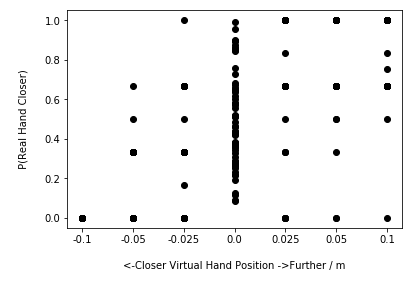

In [153]:
# print(resultDF2)
# lines = resultDF2.plot.line()

for index, row in resultDF2.iterrows():
    vals = (row['P-0.1'], row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])
    plt.plot(vals,'ko')

xVals = np.arange(len(proprioceptiveVals))
plt.xticks(xVals,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [131]:
# print(resultDF2['P-0.1'] + random.uniform(0.0, 0.05))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]


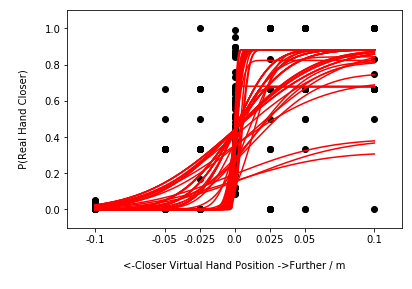

In [155]:
# Curve fitting part 
xVals = np.arange(len(proprioceptiveVals)) # This doesn't change
# xVals = np.pad(xVals, (1, 1), 'edge')
x = proprioceptiveVals
print(x)
yCurves = []
yVals = []
jnd = []
pseVal = []

for index, row in resultDF2.iterrows():

    vals = (row['P-0.1'] + random.uniform(0.0, 0.05), row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])

    # choose the input and output variables
    y = vals #+ random.uniform(0.0, 0.05)
#     y = np.pad(vals, (1, 1), 'edge')
    
    yVals.append(y)
    # curve fit
    popt, _ = curve_fit(perc.psyFunction, x, y, maxfev=10000, 
                        bounds=(0,[1.40000000e-02, 5.20511345e-02, 8.81520277e-01, 5.20416271e-33])) # Works best
#                         bounds=(0,[0.014,  0.056,  0.91, 0.1])) # Works well

    # summarize the parameter values
    a, b, c, d = popt

    # plot input vs output
    plt.scatter(x, y,color=[0,0,0])

    # define a sequence of inputs between the smallest and largest known inputs
#     x_line = np.arange(min(x), max(x)+1, 0.1)
    x_line = np.arange(min(x), max(x)+0.001, 0.001)


    # calculate the output for the range
    y_line = perc.psyFunction(x_line, a, b, c, d)

    # Find JND sensitivity value to visual-proprioceptive errors 
    pidx,_ = perc.find_nearest(y_line, 0.5) 
    pse = x_line[pidx]
    p2idx,_ = perc.find_nearest(y_line, 0.75)
    p75 = x_line[p2idx]
    jndVal = np.round(p75 - pse,3)
    jnd.append(jndVal)
    pseVal.append(pse)
#     print("JND: ", jndVal)
    
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '-', color='red')
    yCurves.append(y_line)
    
#     plt.show()
#     flag = input("Enter or 0 to stop: ")  
#     if flag == 0:
#         break
    
# # plt.legend(['Fitted Curve','Data Points']
plt.ylim([-0.1,1.1])
plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [144]:
popt

array([1.40000000e-02, 5.20505008e-02, 8.81516980e-01, 2.60208136e-33])

In [146]:
# Average JND Sensitivity to visual-proprioceptive errors
averageJND = np.round(np.mean(jnd),4)
medianJND = np.round(np.median(jnd),4)
stdErr = np.round(np.std(jnd, axis=0)/np.sqrt(len(jnd)),4)
minJND = np.round(np.min(jnd),4)
maxJND = np.round(np.max(jnd),4)

averagePSE = np.round(np.mean(pseVal),4)
stdErrPSE = np.round(np.std(pseVal, axis=0)/np.sqrt(len(pseVal)),4)
print("The average PSE bias in visual-proprioceptive error is: ", np.round(averagePSE*100,3), "SE:", stdErrPSE*100,"cm")

print("The average JND to visual-proprioceptive error is: ", averageJND*100, "SE:", stdErr*100,"cm")
print("The medial JND is: ", np.round(medianJND*100,4), "cm")
print("The min JND is: ", minJND*100, "cm and the max JND is: ", maxJND*100,"cm")

The average PSE bias in visual-proprioceptive error is:  1.07 SE: 0.27 cm
The average JND to visual-proprioceptive error is:  2.09 SE: 0.24 cm
The medial JND is:  1.8 cm
The min JND is:  0.0 cm and the max JND is:  7.7 cm


(63, 201)


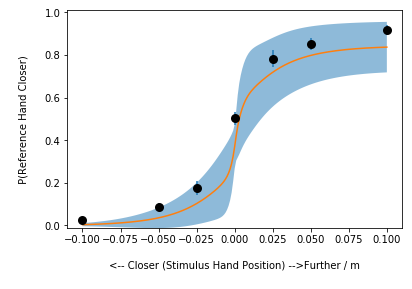

In [164]:
#----------------------------------------
#----------- # Average curve ------------
#----------------------------------------
curveArrShape = np.shape(yCurves)
print(curveArrShape)

# plt.figure()
yValsMean = np.mean(yVals, axis=0)  
yValsSE = np.round(np.std(yVals, axis=0)/np.sqrt(len(yVals)),4)
plt.errorbar(x, yValsMean, yValsSE,marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')

ydata = np.mean(yCurves, axis=0)
# yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
yerr = np.std(yCurves, axis=0)
plt.plot(x_line, ydata)
plt.fill_between(x_line, ydata-yerr, ydata+yerr, alpha=0.5)
# plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-- Closer (Stimulus Hand Position) -->Further / m \n")
plt.ylabel("\n P(Reference Hand Closer) \n")
plt.ylim([-0.01, 1.01])
plt.show()